<a href="https://colab.research.google.com/drive/1PAutjUqaCfB5q7gaMcR1yNBF4Fibx2YC?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outline

This tutorial will demonstrate the application of soundscape_IR in assessing acoustic diversity in an semi-supervised approach. Please contact Yi-Jen Sun (elainesun442@gmail.com) or Tzu-Hao Harry Lin (schonkopf@gmail.com) for questions or suggestions.

<img src="https://raw.githubusercontent.com/yijensun/soundscape_IR/master/docs/images/workflow_case2_v3.png" width="900"/>

This demo contains three sections:
1. Model training
  - Nonnegative matrix factorization (NMF)
2. Semi-supervised source separation
  - Learning basis functions from fish sounds
  - Reconstruct the spectrogram of fish sounds
3. More examples
  - Shipping noise
  - Echo sounder

# Installation

In [ ]:
# Clone soundscape_IR from GitHub @schonkopf
!git clone https://github.com/schonkopf/soundscape_IR.git

# Install required packages
%cd soundscape_IR
%pip install -r requirements.txt

# 1. Model training

In order to assess the diversity of sounds, we need a model that can separate various sounds from ambient noise. We select one audio recording only contains ambient noise from long-duration underwater recordings collected at a river estuary and use the function ```audio_visualization``` to generate a spectrogram.

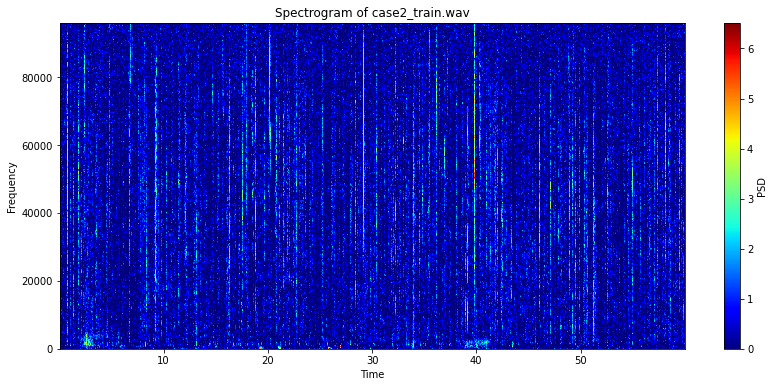

In [ ]:
from soundscape_IR.soundscape_viewer import audio_visualization

sound_train=audio_visualization(filename='case2_train.wav', path='./data/wav', FFT_size=1024, time_resolution=0.05, prewhiten_percent=50)

## NMF
We use the function ```source_separation``` and choose conventional NMF to to learn a set of basis functions from the spectrogram of ambient noise. After model training, we can visualize the learned basis functions. This model will be used as a baseline for identifying sound types that are unseen in the training spectrogram.

Feature learning...
Done
Successifully save to ./data/model/case2_model.mat


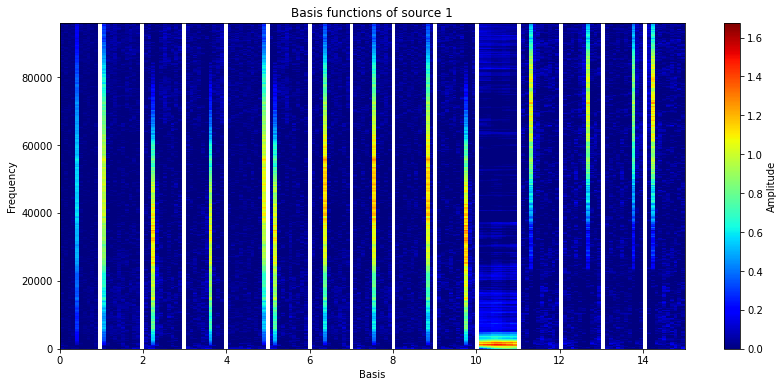

In [ ]:
from soundscape_IR.soundscape_viewer import source_separation

# Assign parameters and train the model
model=source_separation(feature_length=10, basis_num=15)
model.learn_feature(input_data=sound_train.data, f=sound_train.f, method='NMF')

# Plot the basis functions
model.plot_nmf(plot_type='W', source=1)

# Save the model
model.save_model(filename='./data/model/case2_model.mat')

# 2. Semi-supervised source separation

## Learning basis functions from fish sounds
Here, we use an audio recording of fish sounds to demonstrate the use of semi-supervised learning in identifying unseen sounds. First of all, use the function ```audio_visualization``` to generate a spectrogram of fish sounds. In addition to fish sounds (< 10 kHz), this recording also contains a few noise signals in high-frequency bands.

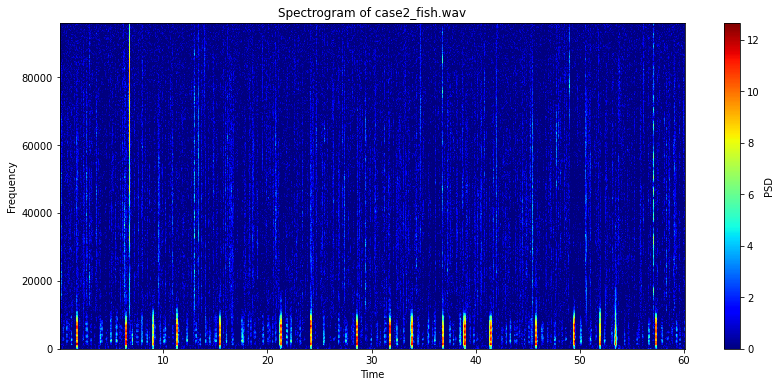

In [ ]:
# Generate a spectrogram
sound_predict=audio_visualization(filename='case2_fish.wav', path='./data/wav/', FFT_size=1024, time_resolution=0.05, prewhiten_percent=50)

Load the model of ambient noise and run model prediction. Here, we add a small number of newly initiated basis functions (*additional_basis*) to enable semi-supervised learning. After model prediction, the model will separate unseen sounds to a new source (*source=2*). The plot of newly initiated basis functions will show that fish sounds are successifully learned in a semi-supervised manner.

Model parameters check
Minima and maxima frequancy bin: 0.0 Hz and 96000.0 Hz
Frequancy resolution: 187.5 Hz
Feature length: 10
Number of basis: 15
Number of source: 1


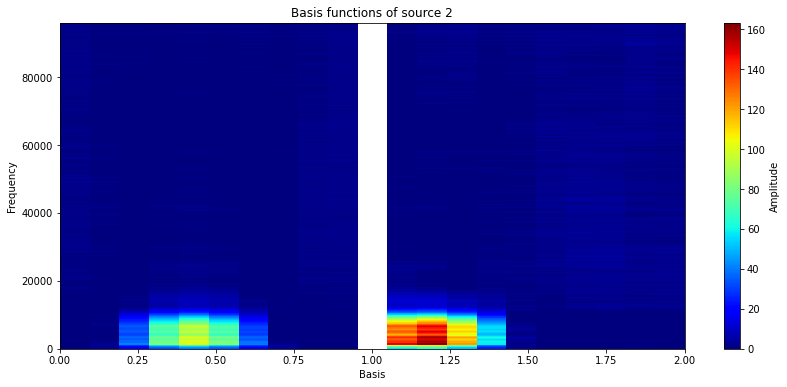

In [ ]:
# Deploy the model with semi-supervised separation
model=source_separation()
model.load_model(filename='./data/model/case2_model.mat')
model.prediction(input_data=sound_predict.data, f=sound_predict.f, additional_basis=2)

# Plot the newly learned features
model.plot_nmf(plot_type='W', source=2)

## Reconstruct the spectrogram of fish sounds
Plot the reconstructed spectrogram to examine the separation of fish sounds.

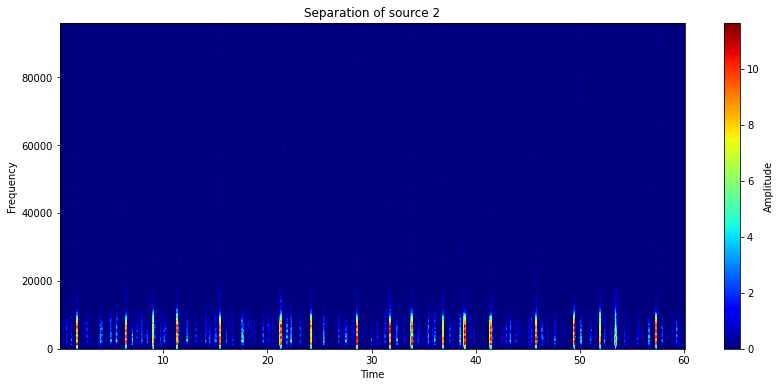

In [ ]:
#Plot the reconstruction of the newly learned source
model.plot_nmf(plot_type='separation', source=2)

# More examples
Below we present two additional examples of applying semi-supervised learning in separating shipping noise and echosounder signals.

## Shipping noise

Model parameters check
Minima and maxima frequancy bin: 0.0 Hz and 96000.0 Hz
Frequancy resolution: 187.5 Hz
Feature length: 10
Number of basis: 15
Number of source: 1


/content/soundscape_IR/soundscape_viewer/source_separation.py:314: RuntimeWarning: invalid value encountered in true_divide
  mask=np.divide(source,source0)


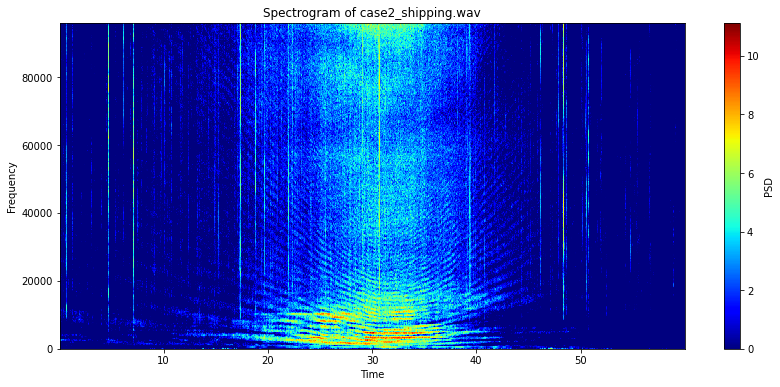

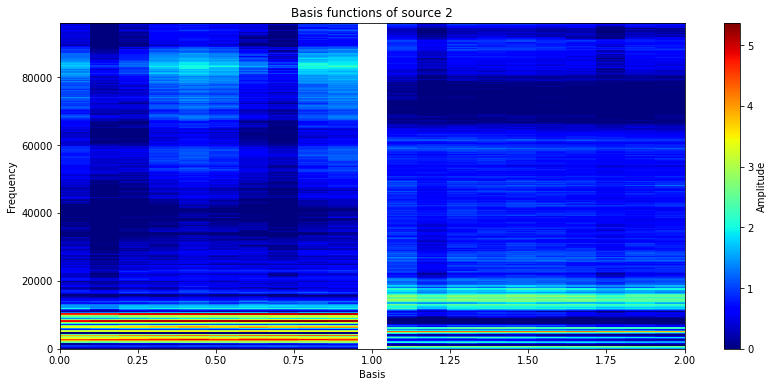

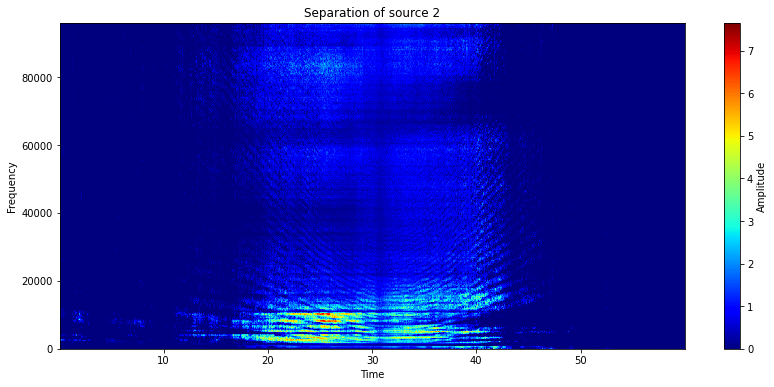

In [ ]:
# The spectrogram of shipping noise
sound_predict = audio_visualization(filename='case2_shipping.wav', path='./data/wav/', FFT_size=1024, time_resolution=0.05, prewhiten_percent=50)

#Deploy the model
model = source_separation()
model.load_model(filename='./data/model/case2_model.mat')
model.prediction(input_data=sound_predict.data, f=sound_predict.f, additional_basis=2)

#Plot the newly learned basis functions and reconstruction
model.plot_nmf(plot_type='W', source=2)
model.plot_nmf(plot_type='separation', source=2)

## Sounds of echo sounder

Model parameters check
Minima and maxima frequancy bin: 0.0 Hz and 96000.0 Hz
Frequancy resolution: 187.5 Hz
Feature length: 10
Number of basis: 15
Number of source: 1


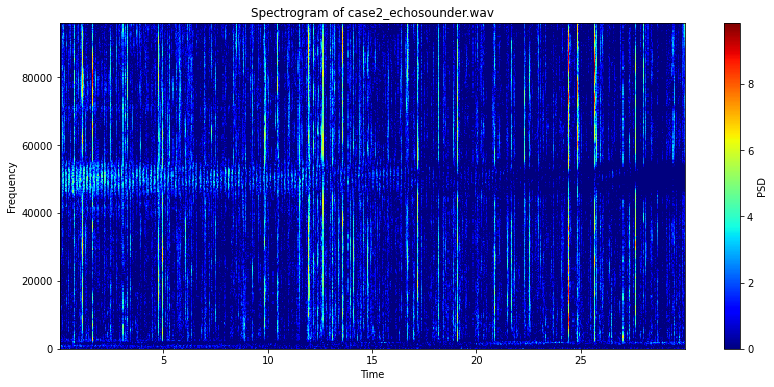

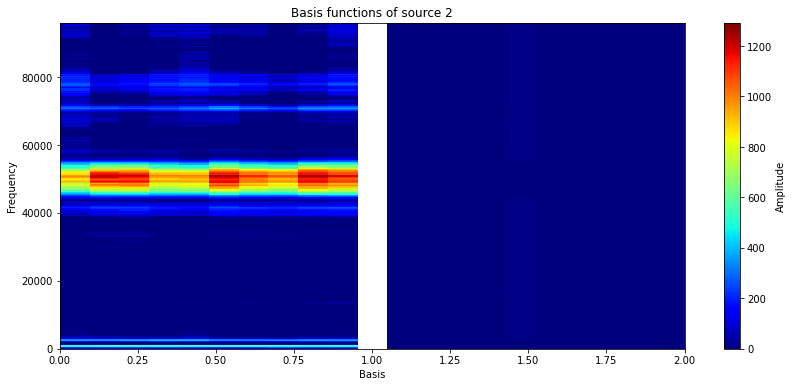

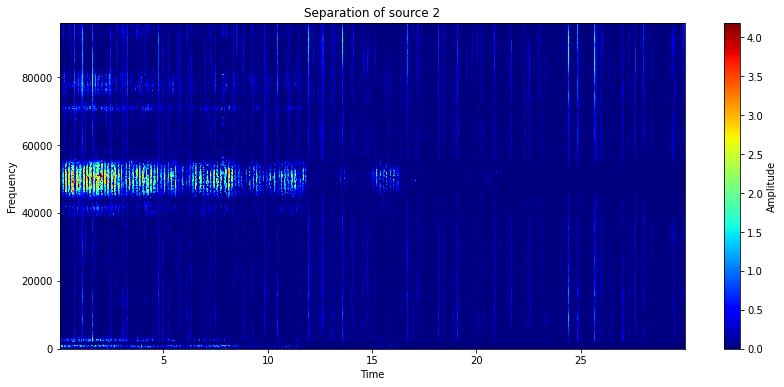

In [ ]:
# The spectrogram of echosounder
sound_predict=audio_visualization(filename='case2_echosounder.wav', path='./data/wav/', FFT_size=1024, time_resolution=0.05, prewhiten_percent=50)

#Deploy the model
model = source_separation()
model.load_model(filename='./data/model/case2_model.mat')
model.prediction(input_data=sound_predict.data, f=sound_predict.f, additional_basis=2)

#Plot the newly learned basis functions and reconstruction
model.plot_nmf(plot_type='W', source=2)
model.plot_nmf(plot_type='separation', source=2)